In [1]:
from STL_to_path import *
from GPT import *
from NL_to_STL import *
from visualization import *

         Install drake (https://drake.mit.edu/installation.html)
         to use the Drake-based solvers.


In [2]:
T_max = 10              # time horizon in seconds 
dt = 0.5                # time step in seconds
max_acc = 100           # maximum acceleration in m/s^2
N_max = int(T_max/dt)   # number of time steps
print("N_max = ", N_max)

N_max =  20


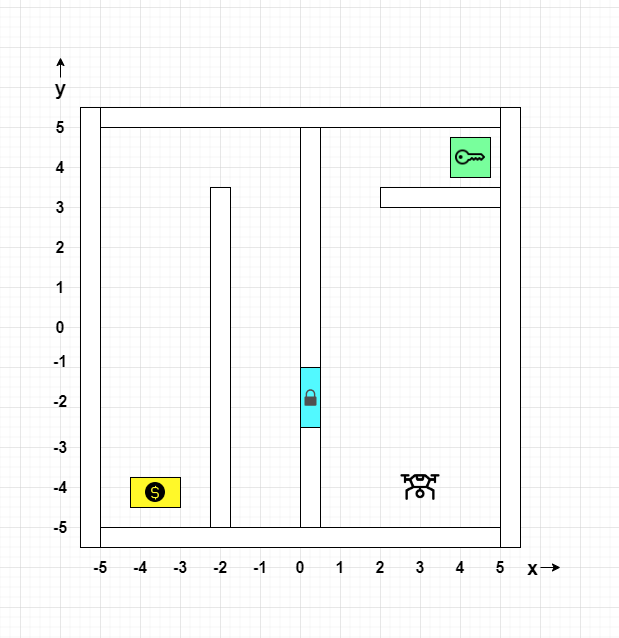

In [3]:
from IPython.display import Image 
image_path = '../Treasure_hunt.png'                 # path to the image
Image(filename=image_path, width=400, height=400)   # display the image

In [4]:
x0 = np.array([3.,-4.,0.5,0.,0.,0.]) # initial state: x, y, z, vx, vy, vz

objects = {"key": (3.75, 4.75, 3.75, 4.75, 1., 2.),
           "chest": (-4.25, -3, -4.5, -3.75, 0., 0.75),
           "door": (0., 0.5, -2.5, -1, 0., 2.5),
           "top_door": (0., 0.5, -2.5, -1, 2.5, 3.),
           "southern_wall": (-5., 5., -5.5, -5., 0., 3.),
           "northern_wall": (-5., 5., 5., 5.5, 0., 3.),
           "western_wall": (-5.5, -5., -5.5, 5.5, 0., 3.),
           "eastern_wall": (5., 5.5, -5.5, 5.5, 0., 3.),
           "floor": (-5.5, 5.5, -5.5, 5.5, -0.5, 0.),
           "ceiling": (-5.5, 5.5, -5.5, 5.5, 3., 3.5),
           "NE_inside_wall": (2., 5., 3., 3.5, 0., 3.),
           "south_mid_inside_wall": (0., 0.5, -5., -2.5, 0., 3.),
           "north_mid_inside_wall": (0., 0.5, -1., 5., 0., 3.),
           "west_inside_wall": (-2.25, -1.75, -5., 3.5, 0., 3.),
           }

In [5]:
# make separate dictionaries for the fixed objects and the interactive objects
fixed_objects = {k: v for k, v in objects.items() if k not in ["key", "chest", "door"]}
interactive_objects = {k: v for k, v in objects.items() if k in ["key", "chest", "door"]}

In [6]:
display("Fixed objects", fixed_objects)
display("Interactive objects", interactive_objects)

'Fixed objects'

{'top_door': (0.0, 0.5, -2.5, -1, 2.5, 3.0),
 'southern_wall': (-5.0, 5.0, -5.5, -5.0, 0.0, 3.0),
 'northern_wall': (-5.0, 5.0, 5.0, 5.5, 0.0, 3.0),
 'western_wall': (-5.5, -5.0, -5.5, 5.5, 0.0, 3.0),
 'eastern_wall': (5.0, 5.5, -5.5, 5.5, 0.0, 3.0),
 'floor': (-5.5, 5.5, -5.5, 5.5, -0.5, 0.0),
 'ceiling': (-5.5, 5.5, -5.5, 5.5, 3.0, 3.5),
 'NE_inside_wall': (2.0, 5.0, 3.0, 3.5, 0.0, 3.0),
 'south_mid_inside_wall': (0.0, 0.5, -5.0, -2.5, 0.0, 3.0),
 'north_mid_inside_wall': (0.0, 0.5, -1.0, 5.0, 0.0, 3.0),
 'west_inside_wall': (-2.25, -1.75, -5.0, 3.5, 0.0, 3.0)}

'Interactive objects'

{'key': (3.75, 4.75, 3.75, 4.75, 1.0, 2.0),
 'chest': (-4.25, -3, -4.5, -3.75, 0.0, 0.75),
 'door': (0.0, 0.5, -2.5, -1, 0.0, 2.5)}

In [7]:
def get_clwh(object):
    # get center, length, width, height of object
    xmin, xmax, ymin, ymax, zmin, zmax = objects[object]
    center = ((xmin + xmax)/2, (ymin + ymax)/2, (zmin + zmax)/2)
    length = xmax - xmin
    width = ymax - ymin
    height = zmax - zmin
    return center, length, width, height

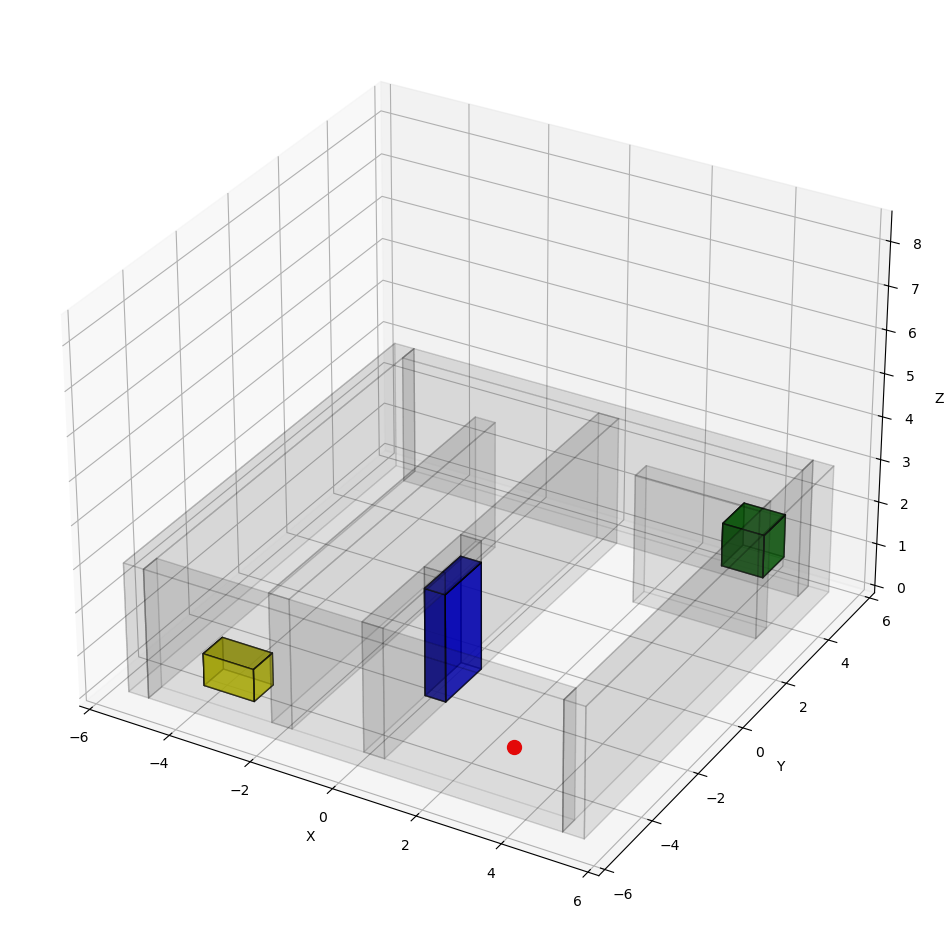

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

for object in fixed_objects:
    # omit the ceiling and the floor
    if object in ["ceiling", "floor"]:
        continue
    center, length, width, height = get_clwh(object)
    X, Y, Z = shapes.make_cuboid(center, (length, width, height))
    ax.plot_surface(X, Y, Z, color='gray', rstride=1, cstride=1, alpha=0.05, linewidth=1., edgecolor='k')

# show key in green, chest in yellow, door in blue
for object in interactive_objects:
    center, length, width, height = get_clwh(object)
    X, Y, Z = shapes.make_cuboid(center, (length, width, height))
    if object == "key":
        ax.plot_surface(X, Y, Z, color='green', rstride=1, cstride=1, alpha=0.5, linewidth=1., edgecolor='k')
    elif object == "chest":
        ax.plot_surface(X, Y, Z, color='yellow', rstride=1, cstride=1, alpha=0.5, linewidth=1., edgecolor='k')
    elif object == "door":
        ax.plot_surface(X, Y, Z, color='blue', rstride=1, cstride=1, alpha=0.5, linewidth=1., edgecolor='k')

# show the initial position of the drone
ax.scatter(x0[0], x0[1], x0[2], color='red', s=100)


ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_zlim(0, 8.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


In [9]:
user_input = [{"role": "user", "content": "I think there might be some valuable items in the chest.\nI want to open it, but a door is blocking the way and it is locked.\nI think there should be a key somewhere to open the door.\nPlease help me find a way to get to the chest."}]
# display the user input only
print(user_input[0]["content"])

I think there might be some valuable items in the chest.
I want to open it, but a door is blocking the way and it is locked.
I think there should be a key somewhere to open the door.
Please help me find a way to get to the chest.


In [10]:
translator = NL_to_STL(objects, T_max, dt, print_instructions = True)
#spec = translator.extract_STL_formula(user_input)

In [11]:
fixed_objects

{'top_door': (0.0, 0.5, -2.5, -1, 2.5, 3.0),
 'southern_wall': (-5.0, 5.0, -5.5, -5.0, 0.0, 3.0),
 'northern_wall': (-5.0, 5.0, 5.0, 5.5, 0.0, 3.0),
 'western_wall': (-5.5, -5.0, -5.5, 5.5, 0.0, 3.0),
 'eastern_wall': (5.0, 5.5, -5.5, 5.5, 0.0, 3.0),
 'floor': (-5.5, 5.5, -5.5, 5.5, -0.5, 0.0),
 'ceiling': (-5.5, 5.5, -5.5, 5.5, 3.0, 3.5),
 'NE_inside_wall': (2.0, 5.0, 3.0, 3.5, 0.0, 3.0),
 'south_mid_inside_wall': (0.0, 0.5, -5.0, -2.5, 0.0, 3.0),
 'north_mid_inside_wall': (0.0, 0.5, -1.0, 5.0, 0.0, 3.0),
 'west_inside_wall': (-2.25, -1.75, -5.0, 3.5, 0.0, 3.0)}

In [12]:
#fixed_objects_to_add = []
#fixed_objects_to_add = ['southern_wall', 'northern_wall', 'western_wall', 'eastern_wall']
#fixed_objects_to_add = ['southern_wall', 'northern_wall', 'western_wall', 'eastern_wall', 'floor', 'ceiling']
fixed_objects_to_add = fixed_objects

In [13]:
spec = f'STL_formulas.inside_cuboid(objects["key"]).eventually(0, {int(N_max/2)}) & STL_formulas.inside_cuboid(objects["chest"]).eventually({int(N_max/2)}, {N_max})'

# append avoid fixed objects
for object in fixed_objects_to_add:
    spec = spec + f' & STL_formulas.outside_cuboid(fixed_objects["{object}"]).always(0, {N_max})'

In [14]:
print(spec)
spec = eval(spec)
spec

STL_formulas.inside_cuboid(objects["key"]).eventually(0, 10) & STL_formulas.inside_cuboid(objects["chest"]).eventually(10, 20) & STL_formulas.outside_cuboid(fixed_objects["top_door"]).always(0, 20) & STL_formulas.outside_cuboid(fixed_objects["southern_wall"]).always(0, 20) & STL_formulas.outside_cuboid(fixed_objects["northern_wall"]).always(0, 20) & STL_formulas.outside_cuboid(fixed_objects["western_wall"]).always(0, 20) & STL_formulas.outside_cuboid(fixed_objects["eastern_wall"]).always(0, 20) & STL_formulas.outside_cuboid(fixed_objects["floor"]).always(0, 20) & STL_formulas.outside_cuboid(fixed_objects["ceiling"]).always(0, 20) & STL_formulas.outside_cuboid(fixed_objects["NE_inside_wall"]).always(0, 20) & STL_formulas.outside_cuboid(fixed_objects["south_mid_inside_wall"]).always(0, 20) & STL_formulas.outside_cuboid(fixed_objects["north_mid_inside_wall"]).always(0, 20) & STL_formulas.outside_cuboid(fixed_objects["west_inside_wall"]).always(0, 20)


In [15]:
solver = STLSolver(spec, x0, N_max)
x,u = solver.generate_trajectory(dt, max_acc, verbose=True)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-11-29
Setting up optimization problem...
Setup complete in 4.300360202789307 seconds.
<class 'gurobipy.MQuadExpr'>
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-11800H @ 2.30GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 5408 rows, 4942 columns and 13372 nonzeros
Model fingerprint: 0xf34fdca4
Model has 123 quadratic objective terms
Variable types: 3424 continuous, 1518 integer (1518 binary)
Coefficient statistics:
  Matrix range     [5e-01, 1e+03]
  Objective range  [1e+00, 1e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [5e-01, 1e+03]
Presolve removed 3548 rows and 3335 columns
Presolve time: 0.01s
Presolved: 1860 rows, 1607 columns, 6090 nonzeros
Presolved model has 57 quadratic objective terms
Variable typ

In [17]:
# save x and u to a file
np.save('x.npy', x)
np.save('u.npy', u)

In [18]:
# read x and u from a file
x = np.load('x.npy')
u = np.load('u.npy')

In [29]:
x.shape

(6, 41)

In [26]:
#get only a specific set of objects
objects = {k: v for k, v in objects.items() if k in fixed_objects_to_add}
#add the interactive objects
objects.update(interactive_objects)

#remove the ceiling and the floor
objects.pop("ceiling", None)
objects.pop("floor", None)

objects

{'top_door': (0.0, 0.5, -2.5, -1, 2.5, 3.0),
 'southern_wall': (-5.0, 5.0, -5.5, -5.0, 0.0, 3.0),
 'northern_wall': (-5.0, 5.0, 5.0, 5.5, 0.0, 3.0),
 'western_wall': (-5.5, -5.0, -5.5, 5.5, 0.0, 3.0),
 'eastern_wall': (5.0, 5.5, -5.5, 5.5, 0.0, 3.0),
 'NE_inside_wall': (2.0, 5.0, 3.0, 3.5, 0.0, 3.0),
 'south_mid_inside_wall': (0.0, 0.5, -5.0, -2.5, 0.0, 3.0),
 'north_mid_inside_wall': (0.0, 0.5, -1.0, 5.0, 0.0, 3.0),
 'west_inside_wall': (-2.25, -1.75, -5.0, 3.5, 0.0, 3.0),
 'key': (3.75, 4.75, 3.75, 4.75, 1.0, 2.0),
 'chest': (-4.25, -3, -4.5, -3.75, 0.0, 0.75),
 'door': (0.0, 0.5, -2.5, -1, 0.0, 2.5)}

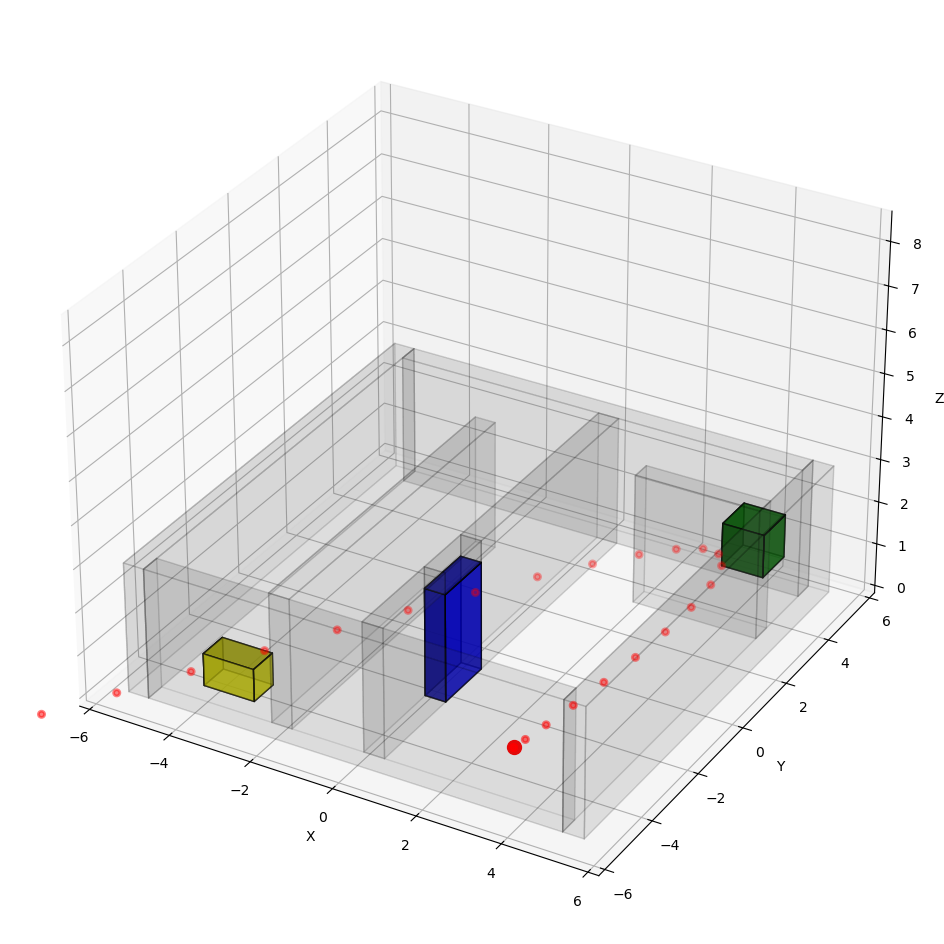

In [31]:
# visualize the trajectory
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

for object in fixed_objects:
    # omit the ceiling and the floor
    if object in ["ceiling", "floor"]:
        continue
    center, length, width, height = get_clwh(object)
    X, Y, Z = shapes.make_cuboid(center, (length, width, height))
    ax.plot_surface(X, Y, Z, color='gray', rstride=1, cstride=1, alpha=0.05, linewidth=1., edgecolor='k')

# show key in green, chest in yellow, door in blue
for object in interactive_objects:
    center, length, width, height = get_clwh(object)
    X, Y, Z = shapes.make_cuboid(center, (length, width, height))
    if object == "key":
        ax.plot_surface(X, Y, Z, color='green', rstride=1, cstride=1, alpha=0.5, linewidth=1., edgecolor='k')
    elif object == "chest":
        ax.plot_surface(X, Y, Z, color='yellow', rstride=1, cstride=1, alpha=0.5, linewidth=1., edgecolor='k')
    elif object == "door":
        ax.plot_surface(X, Y, Z, color='blue', rstride=1, cstride=1, alpha=0.5, linewidth=1., edgecolor='k')

# show the initial position of the drone
ax.scatter(x0[0], x0[1], x0[2], color='red', s=100)

# plot the trajectory
ax.scatter(x[0,:], x[1,:], x[2,:], color='red', linewidth=2)


ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_zlim(0, 8.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()
